In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import sys
sys.path.append("..")
from src import color_converter

In [2]:
blue_color_scheme = ["#f7fbff", "#eff3ff", "#deebf7", "#c6dbef", "#bdd7e7", "#9ecae1", "#6baed6", "#4292c6", "#3182bd", "#2171b5", "#08519c", "#084594", "#08306b"]
green_color_scheme = ['#f7fcf5', '#edf8e9', '#e5f5e0','#c7e9c0', '#bae4b3', '#a1d99b','#74c476','#41ab5d','#31a354' ,'#238b45','#006d2c', '#005a32','#00441b']
orange_color_scheme = ['#fff5eb', '#feedde', '#fee6ce', '#fdd0a2', '#fdbe85', '#fdae6b', '#fd8d3c', '#f16913', '#e6550d', '#d94801', '#a63603', '#8c2d04', '#7f2704']
purple_color_scheme = ['#fcfbfd', '#f2f0f7', '#efedf5', '#dadaeb', '#cbc9e2', '#bcbddc', '#9e9ac8', '#807dba', '#756bb1', '#6a51a3', '#54278f', '#4a1486', '#3f007d']
red_color_scheme = ['#fff5f0', '#fee5d9', '#fee0d2', '#fcbba1', '#fcae91', '#fc9272', '#fb6a4a', '#ef3b2c', '#de2d26', '#cb181d', '#a50f15', '#99000d', '#67000d']
grey_color_scheme = ['#ffffff','#f7f7f7', '#f0f0f0','#d9d9d9','#cccccc','#bdbdbd','#969696','#737373','#636363','#525252','#252525','#000000']

In [3]:
rgb_in_hex = grey_color_scheme

In [4]:
rgb = []
rgb_255 = []
for i in rgb_in_hex:
    rgb_255.append(color_converter.hex_to_rgb(i))
    rgb.append(color_converter.rgb255_to_rgb01(color_converter.hex_to_rgb(i)))
rgb_255

[(255, 255, 255),
 (247, 247, 247),
 (240, 240, 240),
 (217, 217, 217),
 (204, 204, 204),
 (189, 189, 189),
 (150, 150, 150),
 (115, 115, 115),
 (99, 99, 99),
 (82, 82, 82),
 (37, 37, 37),
 (0, 0, 0)]

In [5]:
rgb

[[1.0, 1.0, 1.0],
 [0.9686274509803922, 0.9686274509803922, 0.9686274509803922],
 [0.9411764705882353, 0.9411764705882353, 0.9411764705882353],
 [0.8509803921568627, 0.8509803921568627, 0.8509803921568627],
 [0.8, 0.8, 0.8],
 [0.7411764705882353, 0.7411764705882353, 0.7411764705882353],
 [0.5882352941176471, 0.5882352941176471, 0.5882352941176471],
 [0.45098039215686275, 0.45098039215686275, 0.45098039215686275],
 [0.38823529411764707, 0.38823529411764707, 0.38823529411764707],
 [0.3215686274509804, 0.3215686274509804, 0.3215686274509804],
 [0.1450980392156863, 0.1450980392156863, 0.1450980392156863],
 [0.0, 0.0, 0.0]]

In [6]:
rgb_scale = 255
cmyk_scale = 100


def rgb_to_cmyk(r,g,b):
    if (r == 0) and (g == 0) and (b == 0):
        # black
        return 0, 0, 0, cmyk_scale

    # rgb [0,255] -> cmy [0,1]
    c = 1 - r / float(rgb_scale)
    m = 1 - g / float(rgb_scale)
    y = 1 - b / float(rgb_scale)

    # extract out k [0,1]
    min_cmy = min(c, m, y)
    c = (c - min_cmy) 
    m = (m - min_cmy) 
    y = (y - min_cmy) 
    k = min_cmy

    # rescale to the range [0,cmyk_scale]
    return c*cmyk_scale, m*cmyk_scale, y*cmyk_scale, k*cmyk_scale

def cmyk_to_rgb(c,m,y,k):
    """
    """
    r = rgb_scale*(1.0-(c+k)/float(cmyk_scale))
    g = rgb_scale*(1.0-(m+k)/float(cmyk_scale))
    b = rgb_scale*(1.0-(y+k)/float(cmyk_scale))
    return r,g,b

In [7]:
for i in rgb_255:
    print(rgb_to_cmyk(*i))

(0.0, 0.0, 0.0, 0.0)
(0.0, 0.0, 0.0, 3.1372549019607843)
(0.0, 0.0, 0.0, 5.882352941176472)
(0.0, 0.0, 0.0, 14.901960784313728)
(0.0, 0.0, 0.0, 19.999999999999996)
(0.0, 0.0, 0.0, 25.882352941176467)
(0.0, 0.0, 0.0, 41.17647058823529)
(0.0, 0.0, 0.0, 54.90196078431373)
(0.0, 0.0, 0.0, 61.1764705882353)
(0.0, 0.0, 0.0, 67.84313725490196)
(0.0, 0.0, 0.0, 85.49019607843137)
(0, 0, 0, 100)


In [8]:
hsv = color.rgb2hsv([rgb])
hsv

array([[[0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.96862745],
        [0.        , 0.        , 0.94117647],
        [0.        , 0.        , 0.85098039],
        [0.        , 0.        , 0.8       ],
        [0.        , 0.        , 0.74117647],
        [0.        , 0.        , 0.58823529],
        [0.        , 0.        , 0.45098039],
        [0.        , 0.        , 0.38823529],
        [0.        , 0.        , 0.32156863],
        [0.        , 0.        , 0.14509804],
        [0.        , 0.        , 0.        ]]])

In [9]:
xyz = color.rgb2xyz([rgb])
xyz

array([[[0.950456  , 1.        , 1.088754  ],
        [0.88402945, 0.93011086, 1.01266192],
        [0.82819611, 0.87136712, 0.94870444],
        [0.65949458, 0.69387176, 0.75545566],
        [0.57391132, 0.60382734, 0.65741943],
        [0.4836693 , 0.50888132, 0.55404657],
        [0.28987702, 0.30498731, 0.33205616],
        [0.16294722, 0.1714411 , 0.18665718],
        [0.11859012, 0.12477182, 0.13584582],
        [0.08019588, 0.08437621, 0.09186494],
        [0.01758365, 0.01850022, 0.02014219],
        [0.        , 0.        , 0.        ]]])

In [10]:
lab = color.rgb2lab([rgb])
lab

array([[[ 1.00000000e+02, -2.45493786e-03,  4.65342115e-03],
        [ 9.72320997e+01, -2.39636008e-03,  4.54238490e-03],
        [ 9.47962458e+01, -2.34480947e-03,  4.44466891e-03],
        [ 8.66954164e+01, -2.17336954e-03,  4.11969848e-03],
        [ 8.20457817e+01, -2.07496812e-03,  3.93317513e-03],
        [ 7.66111959e+01, -1.95995458e-03,  3.71516292e-03],
        [ 6.20821772e+01, -1.65247322e-03,  3.13232116e-03],
        [ 4.84411039e+01, -1.36378367e-03,  2.58509997e-03],
        [ 4.19646863e+01, -1.22672158e-03,  2.32529394e-03],
        [ 3.48781522e+01, -1.07674743e-03,  2.04101267e-03],
        [ 1.46796420e+01, -6.49281162e-04,  1.23073530e-03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])

In [11]:
rgbcie = color.rgb2rgbcie([rgb])
rgbcie

array([[[0.1488856 , 0.18288098, 0.19277574],
        [0.14421468, 0.17714354, 0.18672788],
        [0.14012763, 0.17212328, 0.18143599],
        [0.12669873, 0.15562813, 0.16404838],
        [0.11910848, 0.14630478, 0.15422059],
        [0.11035051, 0.13554708, 0.14288084],
        [0.08757977, 0.10757705, 0.1133975 ],
        [0.06714449, 0.08247574, 0.08693808],
        [0.05780265, 0.07100085, 0.07484235],
        [0.04787694, 0.05880879, 0.06199063],
        [0.02160301, 0.02653567, 0.02797138],
        [0.        , 0.        , 0.        ]]])

In [12]:
hed = color.rgb2hed([rgb])
hed

array([[[-0.57739655,  0.16859676, -0.42079731],
        [-0.57187146,  0.16698346, -0.41677071],
        [-0.5669889 ,  0.16555778, -0.41321238],
        [-0.55061914,  0.1607779 , -0.40128237],
        [-0.54113603,  0.15800888, -0.39437123],
        [-0.52997704,  0.15475051, -0.38623873],
        [-0.49980364,  0.14594004, -0.36424885],
        [-0.47116634,  0.1375781 , -0.34337845],
        [-0.45753656,  0.13359827, -0.33344528],
        [-0.44265685,  0.12925348, -0.32260118],
        [-0.4011065 ,  0.11712099, -0.29231996],
        [-0.36429666,  0.10637271, -0.26549354]]])

In [13]:
yuv = color.rgb2yuv([rgb])
yuv

array([[[ 1.00000000e+00,  0.00000000e+00, -9.71445147e-17],
        [ 9.68627451e-01, -4.09537283e-17, -1.41324865e-16],
        [ 9.41176471e-01, -4.81446301e-17, -1.45635004e-16],
        [ 8.50980392e-01, -2.62206860e-17, -1.13405753e-16],
        [ 8.00000000e-01, -1.39439416e-17, -9.32591897e-17],
        [ 7.41176471e-01, -6.57742044e-18, -8.62385277e-17],
        [ 5.88235294e-01, -1.10497817e-17, -3.82865686e-17],
        [ 4.50980392e-01,  4.95472122e-18, -2.37555855e-17],
        [ 3.88235294e-01, -2.14415841e-17, -2.88495589e-17],
        [ 3.21568627e-01,  1.66601100e-18, -4.60581677e-17],
        [ 1.45098039e-01, -5.76607083e-18, -1.56289598e-17],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])

In [14]:
yiq = color.rgb2yiq([rgb])
yiq

array([[[ 1.00000000e+00, -5.55111512e-17, -1.00000001e-08],
        [ 9.68627451e-01, -2.97458545e-17, -9.68627455e-09],
        [ 9.41176471e-01,  4.19721669e-18, -9.41176475e-09],
        [ 8.50980392e-01, -2.13514212e-17, -8.50980395e-09],
        [ 8.00000000e-01, -3.64749972e-17, -8.00000003e-09],
        [ 7.41176471e-01, -3.22777806e-17, -7.41176475e-09],
        [ 5.88235294e-01, -3.40514007e-17, -5.88235297e-09],
        [ 4.50980392e-01, -2.09520935e-17, -4.50980395e-09],
        [ 3.88235294e-01, -1.10548635e-17, -3.88235297e-09],
        [ 3.21568627e-01, -2.32131959e-17, -3.21568630e-09],
        [ 1.45098039e-01, -1.26017374e-17, -1.45098040e-09],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])

In [15]:
ypbpr = color.rgb2ypbpr([rgb])
ypbpr

array([[[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 9.68627451e-01,  0.00000000e+00, -2.59326852e-18],
        [ 9.41176471e-01,  0.00000000e+00, -5.46867127e-18],
        [ 8.50980392e-01,  0.00000000e+00,  3.47176754e-19],
        [ 8.00000000e-01,  0.00000000e+00, -8.35420622e-19],
        [ 7.41176471e-01,  0.00000000e+00,  6.34802015e-19],
        [ 5.88235294e-01,  0.00000000e+00,  1.26411300e-18],
        [ 4.50980392e-01,  0.00000000e+00,  3.19005824e-18],
        [ 3.88235294e-01,  0.00000000e+00, -1.99647880e-18],
        [ 3.21568627e-01,  0.00000000e+00,  3.80122948e-20],
        [ 1.45098039e-01,  0.00000000e+00,  4.57095364e-19],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])

In [16]:
ycbcr = color.rgb2ycbcr([rgb])
ycbcr

array([[[235.        , 128.        , 128.        ],
        [228.12941176, 128.        , 128.        ],
        [222.11764706, 128.        , 128.        ],
        [202.36470588, 128.        , 128.        ],
        [191.2       , 128.        , 128.        ],
        [178.31764706, 128.        , 128.        ],
        [144.82352941, 128.        , 128.        ],
        [114.76470588, 128.        , 128.        ],
        [101.02352941, 128.        , 128.        ],
        [ 86.42352941, 128.        , 128.        ],
        [ 47.77647059, 128.        , 128.        ],
        [ 16.        , 128.        , 128.        ]]])

In [17]:
ydbdr = color.rgb2ydbdr([rgb])
ydbdr

array([[[ 1.00000000e+00,  0.00000000e+00,  1.38777878e-16],
        [ 9.68627451e-01, -4.55700837e-17,  9.11980731e-17],
        [ 9.41176471e-01,  3.48348801e-17,  1.78393248e-16],
        [ 8.50980392e-01,  2.40996765e-17,  1.42673237e-16],
        [ 8.00000000e-01,  1.47881707e-17,  1.15107923e-16],
        [ 7.41176471e-01, -6.13992517e-17,  1.54723293e-16],
        [ 5.88235294e-01, -5.22523201e-17,  2.38436721e-17],
        [ 4.50980392e-01, -2.03203467e-17,  4.16540440e-17],
        [ 3.88235294e-01, -4.38211559e-19,  5.75167365e-17],
        [ 3.21568627e-01,  4.49117867e-18,  4.96267515e-17],
        [ 1.45098039e-01, -2.05394525e-17,  2.87790489e-17],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]])

In [18]:
hsv[0][2]

array([0.        , 0.        , 0.94117647])

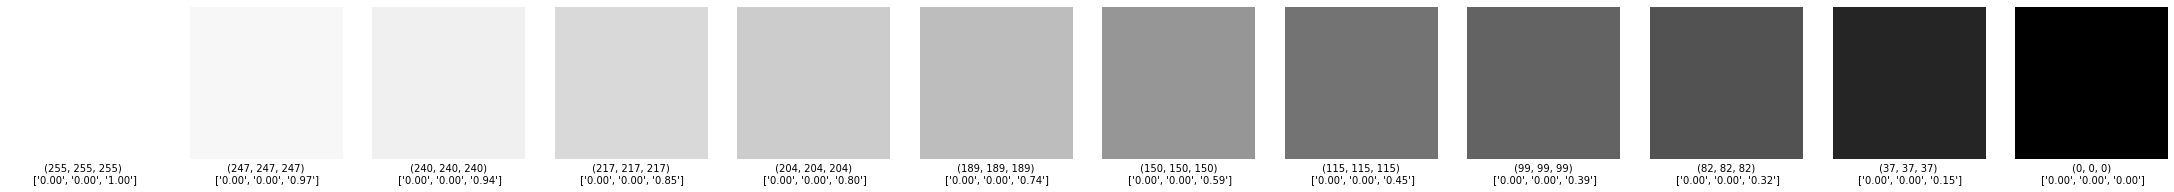

In [19]:
fig, axes = plt.subplots(1,len(rgb))
for i, ax in enumerate(axes):
    ax.imshow([[rgb[i]]])
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel(" {0} \n {1}".format(rgb_255[i], ["{0:.2f}".format(j) for j in hsv[0][i]]))
fig.subplots_adjust(left=0.0, right=5.0, bottom = 0.0, top = 5.0)